In [52]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

# Replace this with the path to your ChromeDriver executable
DRIVER_PATH = r'chromedriver.exe'

# Set Chrome options with a custom user-agent
chrome_options = Options()
chrome_options.add_argument("--user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument(headers)
# Start a new Chrome browser session
driver = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)

# Navigate to the login page
driver.get('https://rocketreach.co/login')

# Wait for the page to load (you might need to adjust the time depending on your network speed)
time.sleep(3)

# Find the "Continue with Google" button and click on it
continue_with_google_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[7]/div[2]/div/form/div[2]/div[3]/a/span[2]")
continue_with_google_button.click()

# Wait for a few seconds to allow for Google login
time.sleep(2)  # Adjust this time based on how long it typically takes to log in through Google

# After logging in, find the phone number input field and fill in the number "999"
phone_input_xpath = "/html/body/div[1]/div[1]/div[2]/div/c-wiz/div/div[2]/div/div[1]/div/form/span/section/div/div/div[1]/div/div[1]/div/div[1]/input"
phone_input = driver.find_element(By.XPATH, phone_input_xpath)
phone_input.send_keys("9886221331")


target_button_xpath = "/html/body/div[1]/div[1]/div[2]/div/c-wiz/div/div[2]/div/div[2]/div/div[1]/div/div/button/span"
target_button = driver.find_element(By.XPATH, target_button_xpath)
target_button.click()


# Wait for a few seconds to see the result
time.sleep(5)

# Print the current page title (you can perform other actions here)
print('Page title:', driver.title)

# Close the browser
#driver.quit()


C:\Users\rajmr\AppData\Local\Temp\ipykernel_6292\421110397.py:16: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=CHROME_DRIVER_PATH)


'\n# Wait for the page to load (you might need to adjust the time depending on your network speed)\ntime.sleep(3)\n\n# Find the "Continue with Google" button and click on it\ncontinue_with_google_button = driver.find_element(By.XPATH, "/html/body/div[1]/div[7]/div[2]/div/form/div[2]/div[3]/a/span[2]")\ncontinue_with_google_button.click()\n\n# Wait for a few seconds to allow for Google login\ntime.sleep(2)  # Adjust this time based on how long it typically takes to log in through Google\n\n# After logging in, find the phone number input field and fill in the number "999"\nphone_input_xpath = "/html/body/div[1]/div[1]/div[2]/div/c-wiz/div/div[2]/div/div[1]/div/form/span/section/div/div/div[1]/div/div[1]/div/div[1]/input"\nphone_input = driver.find_element(By.XPATH, phone_input_xpath)\nphone_input.send_keys("9886221331")\n\n\ntarget_button_xpath = "/html/body/div[1]/div[1]/div[2]/div/c-wiz/div/div[2]/div/div[2]/div/div[1]/div/div/button/span"\ntarget_button = driver.find_element(By.XPATH,

In [1]:
import  os
import sqlite3
con = sqlite3.connect('C:/Users/rajmr/AppData/Local/Google/Chrome/User Data/Default/History')
cursor = con.cursor()
cursor.execute("Select * from urls")
results = cursor.fetchall()

In [6]:
type(results)

list

In [9]:
len(results)

6794

In [5]:
import pandas as pd

In [13]:
df = pd.DataFrame(results)

In [15]:
df.to_csv('my_chrome_history.csv')

In [308]:
df_history = pd.read_csv('my_chrome_history.csv')
df_history.dropna(inplace=True)

In [309]:
# Remove special characters from the specified column
df_history['2'] = df_history['2'].str.replace('[^a-zA-Z0-9\s]', '')

C:\Users\rajmr\AppData\Local\Temp\ipykernel_35512\3218215609.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_history['2'] = df_history['2'].str.replace('[^a-zA-Z0-9\s]', '')


In [310]:
import pandas as pd
import nltk
from nltk.corpus import stopwords


# Download NLTK stopwords (only need to do this once)
nltk.download('stopwords')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords from a text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to the 'text_column'
df_history['2']  = df_history['2'] .apply(remove_stopwords)

# Display the modified DataFrame
print(df)


   A   B    C
0  1  10  100
1  2  20  200
2  3  30  300
3  4  40  400


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rajmr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


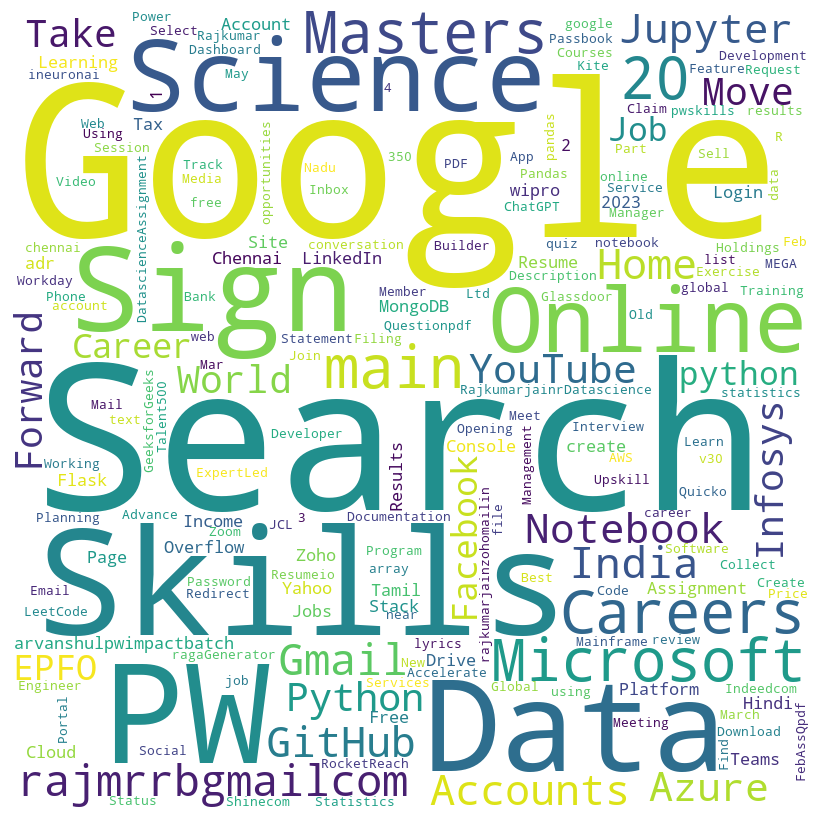

In [311]:
import pandas as pd
import collections
import nltk
from nltk.tokenize import word_tokenize

# Sample data
data = {'text_column': list(df_history['2'])}
df = pd.DataFrame(data)

# Download the required nltk resources (only need to do this once)
#nltk.download('punkt')

def word_frequency_from_column(column):
    # Combine all the values in the column into a single string
    text = ' '.join(column)
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Use collections.Counter to count the frequency of each word
    word_counter = collections.Counter(words)
    
    return word_counter

# Get word frequency from the 'text_column'
frequency = word_frequency_from_column(df['text_column'])

# Create a word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate_from_frequencies(frequency)

# Display the word cloud using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()


In [312]:
df_unigram = pd.DataFrame(frequency.items(), columns=['Word', 'Frequency'])

In [313]:
df_unigram = df_unigram.sort_values(by='Frequency', ascending=True)

In [314]:
df_unigram_100 = df_unigram.tail(50)

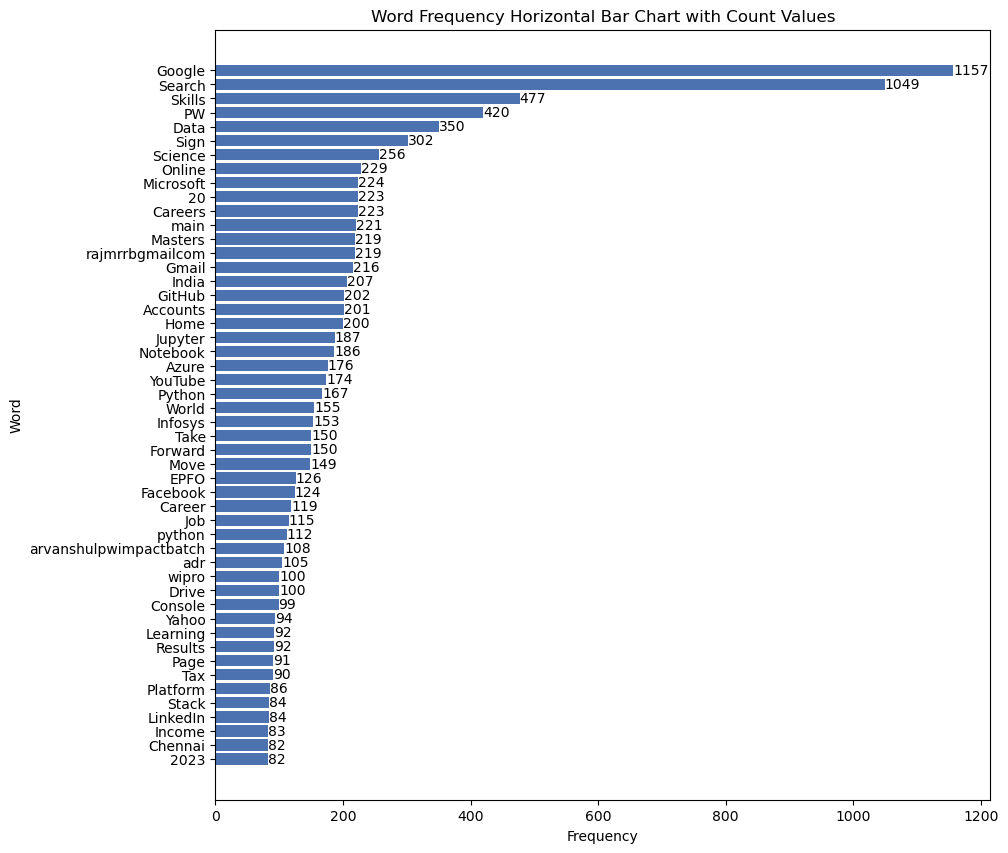

In [315]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import Seaborn for color palettes

# Use Seaborn's color palette
sns.set_palette("deep")

# Create a horizontal bar chart with count values displayed on each bar
plt.figure(figsize=(10, 10))
bars = plt.barh(df_unigram_100['Word'], df_unigram_100['Frequency'])
# Annotate each bar with its count value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center',
             ha='left',
             fontsize=10)

plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Word Frequency Horizontal Bar Chart with Count Values')

# Show the chart
plt.show()


In [316]:
df_history['1']

0                           http://192.168.1.1/index.html
1       http://bangaloresplicem.lntinfotech.com/Splice...
2       http://basicsofguitar.blogspot.in/2009/05/how-...
3       http://ethen8181.github.io/machine-learning/li...
4       http://mainframematerials.blogspot.in/2007/09/...
                              ...                        
6779    http://localhost:8891/tree?token=d4d0f9b30797c...
6780                     http://localhost:8891/tree/hushh
6781    http://localhost:8891/notebooks/hushh/hushh.ai...
6782    https://www.google.com/search?q=where+is+my+ch...
6783    https://docs.nxlog.co/userguide/integrate/brow...
Name: 1, Length: 6354, dtype: object

In [317]:
import pandas as pd
import re

# Regular expression pattern to match URLs
url_pattern = r'https?://\S+|www\.\S+'

# Function to extract the portion of the URL until the first slash after the domain
def extract_url_part(url):
    domain_match = re.search(r'://([^/]+)|www\.([^/]+)', url)
    if domain_match:
        domain = domain_match.group(1) or domain_match.group(2)
        path_start = url.find(domain) + len(domain)
        first_slash = url[path_start:].find('/')
        if first_slash >= 0:
            return url[:path_start + first_slash + 1]
        else:
            return url
    return None

# Function to extract modified URLs from a text
def extract_modified_urls(text):
    urls = re.findall(url_pattern, text)
    return [extract_url_part(url) for url in urls]

# Apply the extract_modified_urls function to the 'text_column'
df_history['websites'] = df_history['1'].apply(extract_modified_urls)

# Display the modified DataFrame
print(df_history['websites'])


0                            [http://192.168.1.1/]
1       [http://bangaloresplicem.lntinfotech.com/]
2             [http://basicsofguitar.blogspot.in/]
3                    [http://ethen8181.github.io/]
4         [http://mainframematerials.blogspot.in/]
                           ...                    
6779                      [http://localhost:8891/]
6780                      [http://localhost:8891/]
6781                      [http://localhost:8891/]
6782                     [https://www.google.com/]
6783                      [https://docs.nxlog.co/]
Name: websites, Length: 6354, dtype: object


In [318]:
df_history_top_100 =pd.DataFrame( df_history['websites'].value_counts().reset_index().head(50))
#  Rename the columns
df_history_top_100.columns = ['website', 'count']
df_history_top_100['website'] = df_history_top_100['website'].astype(str)
df_history_top_100['website'] = list( df_history_top_100['website'])

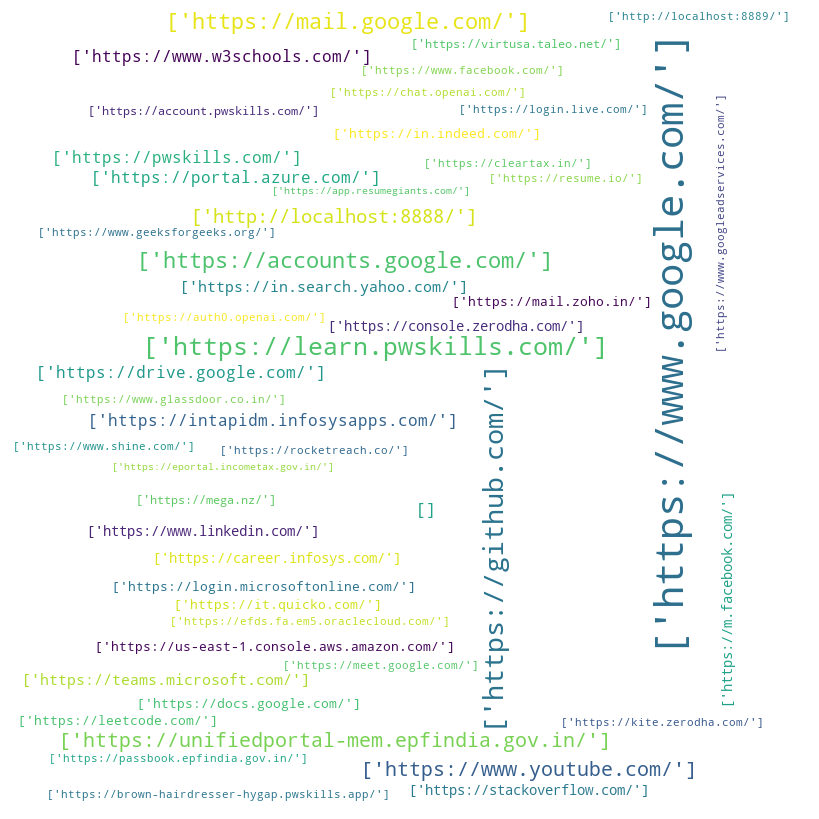

In [319]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Create a dictionary from the DataFrame
word_frequency_dict = dict(zip(df_history_top_100['website'],df_history_top_100['count']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white').generate_from_frequencies(word_frequency_dict)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Display the word cloud
plt.show()


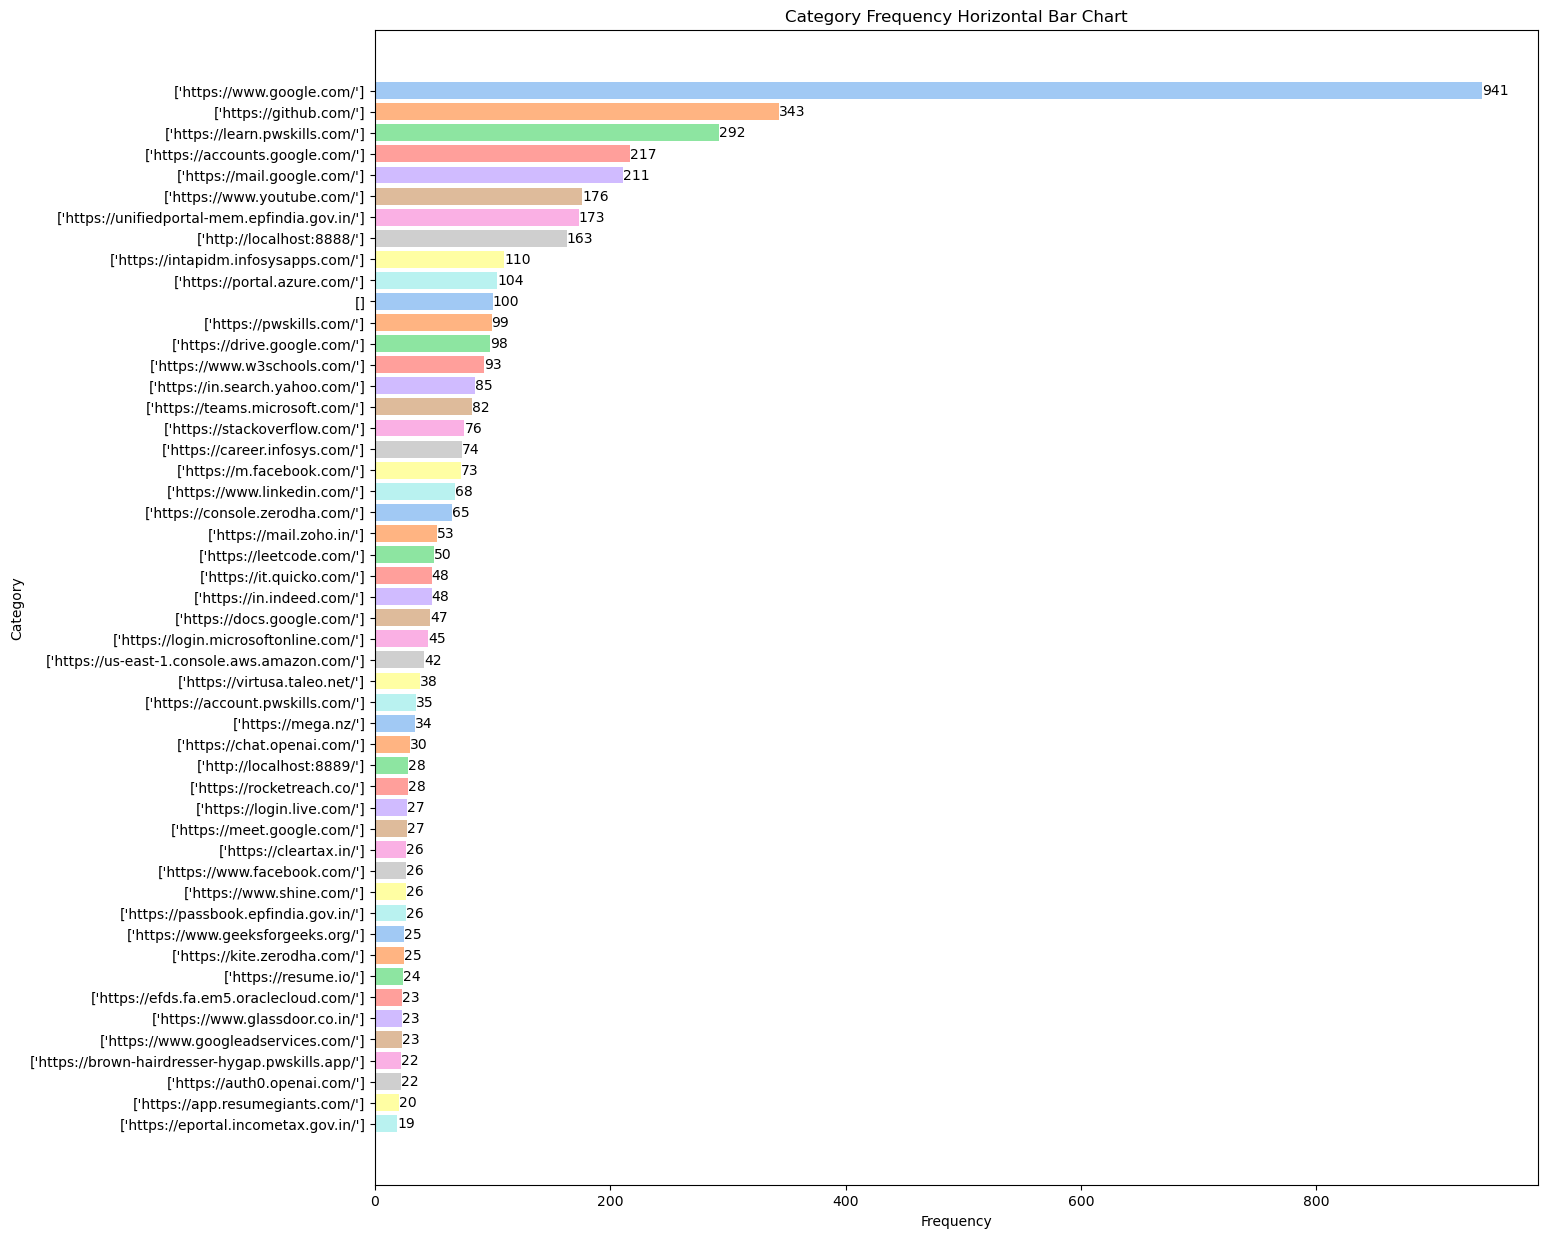

In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a horizontal bar chart
plt.figure(figsize=(15, 15))

# Use Seaborn's color palette
sns.set_palette("pastel")

# Create the bar chart
bars = plt.barh(df_history_top_100['website'], df_history_top_100['count'], color=sns.color_palette())

# Add count values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{int(bar.get_width())}',
             va='center',
             ha='left',
             fontsize=10)

plt.xlabel('Frequency')
plt.ylabel('Category')
plt.title('Category Frequency Horizontal Bar Chart')
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest frequency at the top
plt.show()
